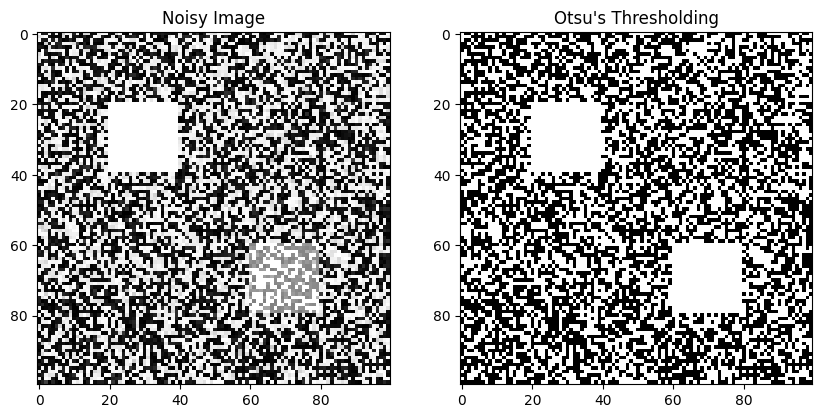

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Generate a sample image with 2 objects and background
image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 255  # Object 1
image[60:80, 60:80] = 128  # Object 2

# Add Gaussian noise to the image
noise = np.random.normal(0, 20, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Otsu's thresholding
_, binary_image = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 2, 2), plt.imshow(binary_image, cmap='gray'), plt.title("Otsu's Thresholding")
plt.show()


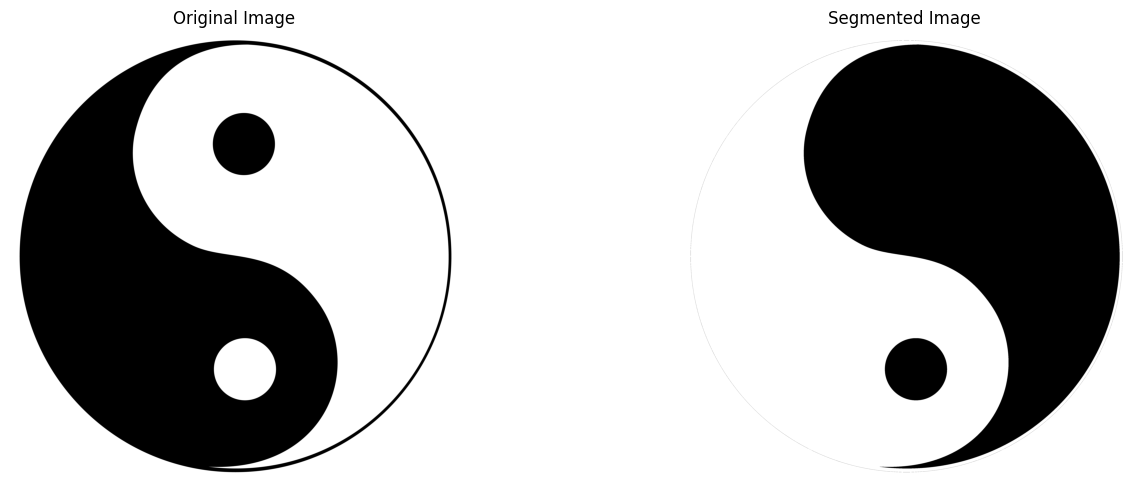

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Function for implementing a region-growing technique for image segmentation
def regionGrowing(image, seeds, threshold):
    # Create a mask to keep track of segmented pixels
    height, width = image.shape[:2]
    segmented = np.zeros((height, width), dtype=np.uint8)
    # For storing the coordinates of pixels in the region
    region_coordinates = []
    # Define 4-neighborhood connectivity
    neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    # Convert seed coordinates to integers
    seeds = [(int(seed[0]), int(seed[1])) for seed in seeds]
    # Add the seeds to the region and mark as visited
    for seed in seeds:
        region_coordinates.append(seed)
        segmented[seed[0], seed[1]] = 1
    # Start region growing
    while len(region_coordinates) > 0:
        # Get the last pixel from the region
        current_pixel = region_coordinates.pop()
        # Check 4-connectivity neighbors
        for dx, dy in neighbors:
            x, y = current_pixel[0] + dx, current_pixel[1] + dy
            # Check if the neighbor is within the image bounds
            if 0 <= x < height and 0 <= y < width:
                # Check if the neighbor is not visited yet
                if segmented[x, y] == 0:
                    # Check if the pixel value is within the threshold
                    if abs(int(image[x, y]) - int(image[current_pixel])) <= threshold:
                        # Add the neighbor to the region and mark as visited
                        region_coordinates.append((x, y))
                        segmented[x, y] = 1
    return segmented

# Load the image from a specified path and convert to grayscale
image_path = '/content/How-To-Rid-Yourself-Of-Black-and-White-Thinking.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


# Define seed points and threshold
seedPoints = [(300, 300), (500, 500), (700, 750)]  # Example seed points
threshold = 20

# Call region growing function
segmentationImage = regionGrowing(img, seedPoints, threshold)

# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Display the images
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmentationImage, cmap='gray')
axes[1].set_title('Segmented Image')
axes[1].axis('off')
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()
